In [3]:
from __future__ import division, print_function
import numpy as np
import scipy as sc
from scipy import signal
import math as math
from math import pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.ticker import FormatStrFormatter
import decimal
import sys
from numpy import genfromtxt
import glob
import datetime
import inspect
%load_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rcParams.update({'font.size': 14})

def adjust_spines(ax, spines, plot_margin = 0 ):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])
        
    x0, x1, y0, y1 = ax.axis()
    ax.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))

        
def white_out(fig, facecolor = 'white'):
    # See http://stackoverflow.com/questions/24542610/matplotlib-figure-facecolor-alpha-while-saving-background-color-transparency
    if facecolor is False:
        # Not all graphs get color-coding
        facecolor = fig.get_facecolor()
        alpha = 1
    else:
        alpha = 0.5
    color_with_alpha = colorConverter.to_rgba(facecolor, alpha)
    fig.patch.set_facecolor(color_with_alpha)    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# data = np.genfromtxt('w1.dat')
data = np.genfromtxt('500-fs-recording/cccc.dat')


OSError: 500-fs-recording/cccc.dat not found.

## Writing trajectory coordinates every 250 steps

Using $\mathrm{d}t$ of 2 fs gives 0.5 picoseconds per frame. These plot titles need to be checked.

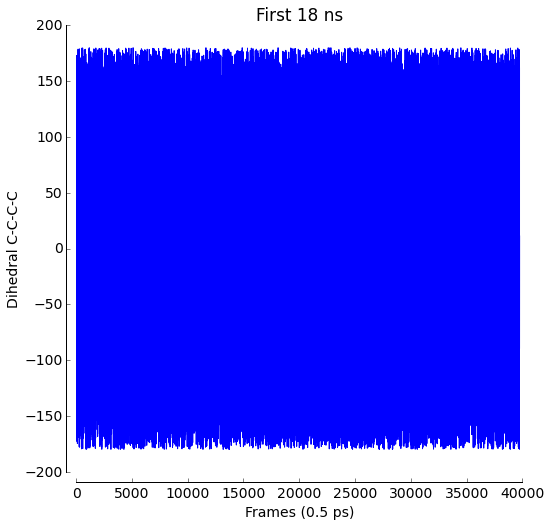

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
ax.plot(data[:, 0], data[:, 1])
ax.set_xlabel('Frames (0.5 ps)')
ax.set_ylabel('Dihedral C-C-C-C')
ax.set_title('First 18 ns')
adjust_spines(ax, ['left', 'bottom'])
plt.show()

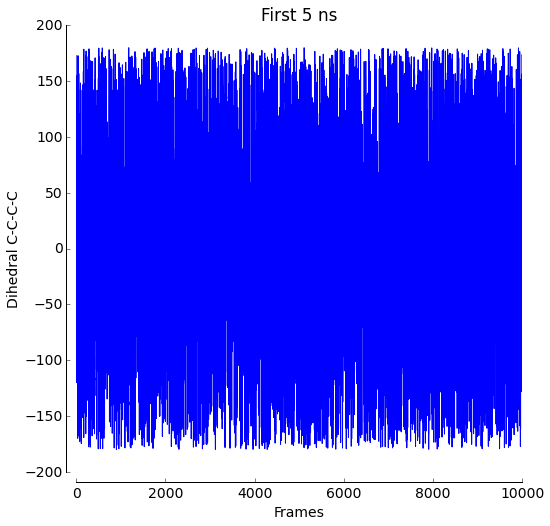

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
ax.plot(data[0:10000, 0], data[0:10000, 1])
ax.set_xlabel('Frames')
ax.set_ylabel('Dihedral C-C-C-C')
ax.set_title('First 5 ns')
adjust_spines(ax, ['left', 'bottom'])
plt.show()

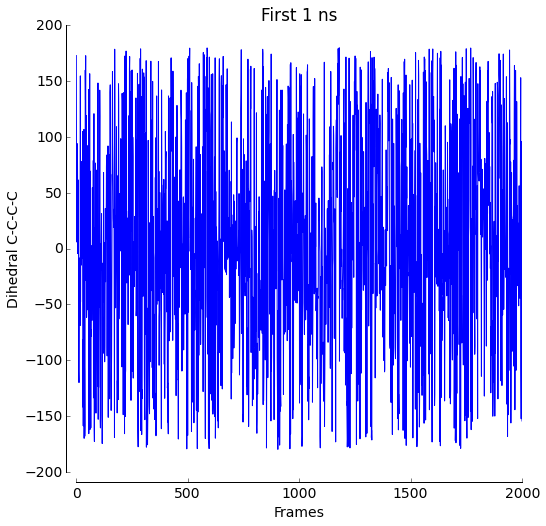

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
ax.plot(data[0:2000, 0], data[0:2000, 1])
ax.set_xlabel('Frames')
ax.set_ylabel('Dihedral C-C-C-C')
ax.set_title('First 1 ns')
adjust_spines(ax, ['left', 'bottom'])
plt.show()

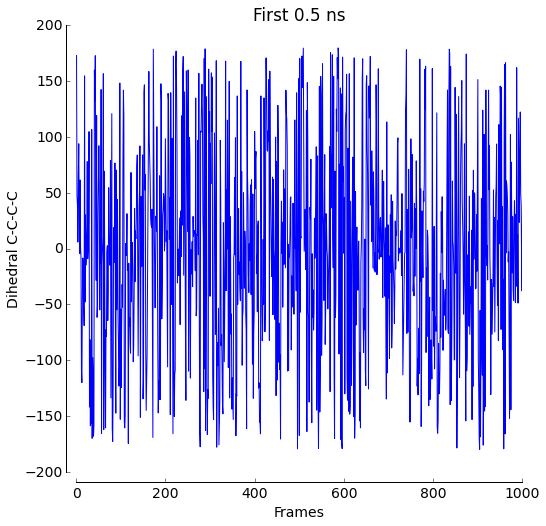

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
ax.plot(data[0:1000, 0], data[0:1000, 1])
ax.set_xlabel('Frames')
ax.set_ylabel('Dihedral C-C-C-C')
ax.set_title('First 0.5 ns')
adjust_spines(ax, ['left', 'bottom'])
plt.show()

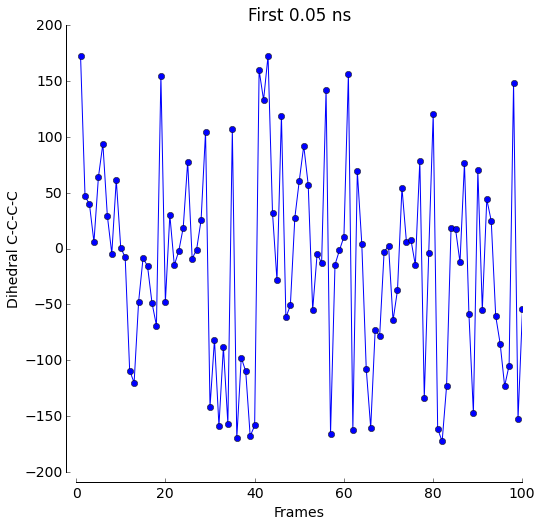

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
ax.plot(data[0:100, 0], data[0:100, 1], 'bo-')
ax.set_xlabel('Frames')
ax.set_ylabel('Dihedral C-C-C-C')
ax.set_title('First 0.05 ns')
adjust_spines(ax, ['left', 'bottom'])
plt.show()

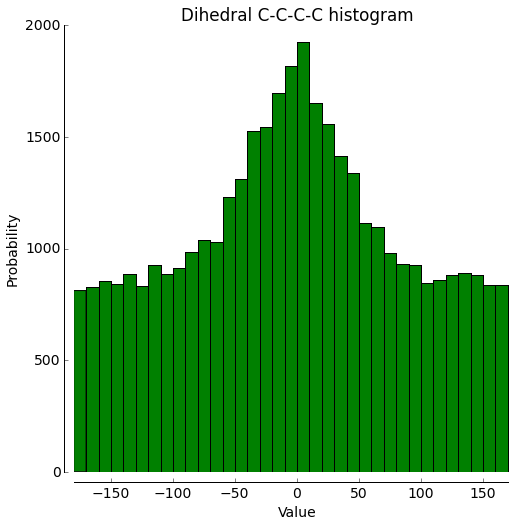

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
rng = np.arange(-180, 180, 10)
ax.hist(data[:, 1], color='g', normed=False, bins=rng)
ax.set_xlabel('Value')
ax.set_ylabel('Probability')
ax.set_xlim([-180, 180])
ax.set_title('Dihedral C-C-C-C histogram')
adjust_spines(ax, ['left', 'bottom'])
plt.show()

The above plot remains confusing.

## Now, writing out trajectory coordinates every 25 steps

Instead of 0.5 picoseconds per frame, we now have 0.05 picoseconds per frame (50 femtoseconds per frame).

In [11]:
data = np.genfromtxt('50-fs-recording/cccc.dat')

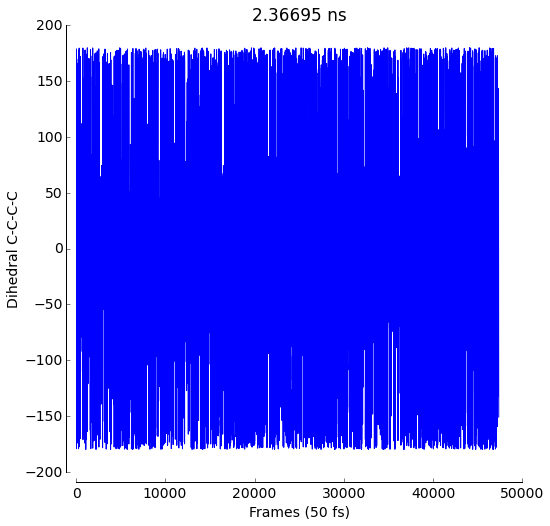

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
frames = len(data[:, 0])
ax.plot(data[0:frames, 0], data[0:frames, 1])
ax.set_xlabel('Frames (50 fs)')
ax.set_ylabel('Dihedral C-C-C-C')
ax.set_title('{} ns'.format(frames * 5e-5))
adjust_spines(ax, ['left', 'bottom'])
plt.show()

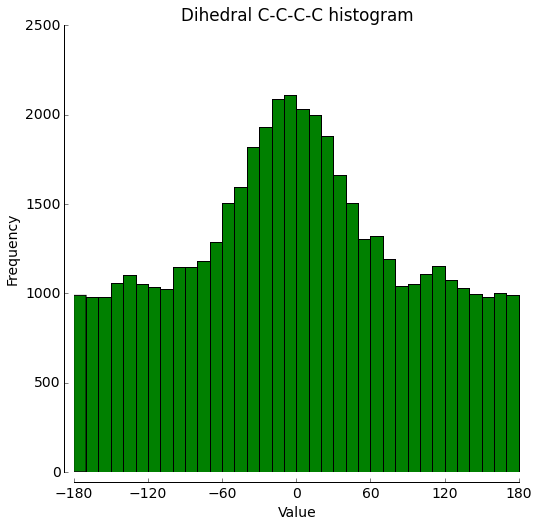

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
rng = np.arange(-180, 181, 10)
ax.hist(data[:, 1], color='g', normed=False, bins=rng)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_xlim([-180, 181])
ax.set_xticks(np.arange(-180, 181, 60))
ax.set_title('Dihedral C-C-C-C histogram')
adjust_spines(ax, ['left', 'bottom'])
plt.show()

This is still not good. No further thoughts to explain this behavior.

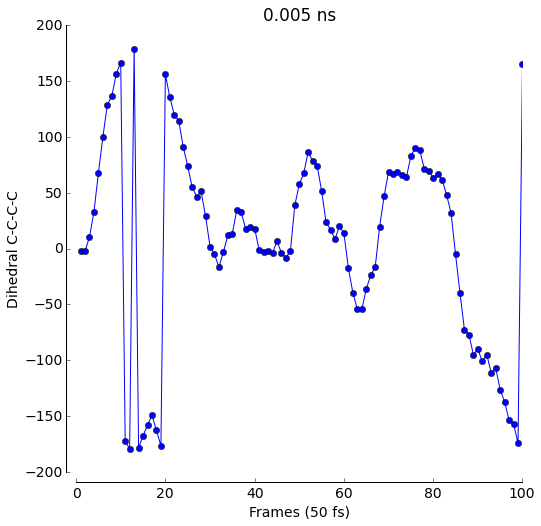

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
frames = 100
ax.plot(data[0:frames, 0], data[0:frames, 1], 'bo-')
ax.set_xlabel('Frames (50 fs)')
ax.set_ylabel('Dihedral C-C-C-C')
ax.set_title('{} ns'.format(frames * 5e-5))
adjust_spines(ax, ['left', 'bottom'])
plt.show()

## Given the system is in bin $i$ at time $t$, what is the probability the system is in bin $i-1$ and $i+1$ after a short time $\mathrm{d}t$?

Let's try setting $\mathrm{d}t$ to be 1 frame here.
And start with bin = 0.

In [15]:
dt     = 1
bin    = 0
frames = len(data[0])
for index in range(frames):
    if data[index, 1] == bin:
        print('System in bin 0')

First we have to bin the system!

In [16]:
rng = np.arange(-180, 181, 1)
histgrm, bin_edges = np.histogram(data[:, 1], density = True, bins = rng)
width = 1.0 * (bin_edges[1] - bin_edges[0])
center = (bin_edges[:-1] + bin_edges[1:]) / 2

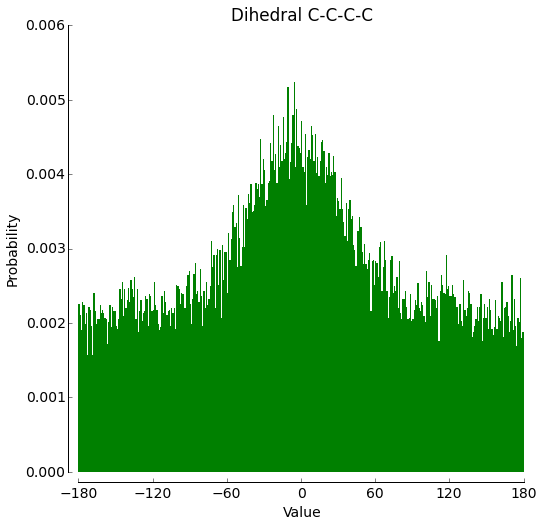

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
ax.bar(center, histgrm, align = 'center', width = width, color='g', edgecolor='none')
ax.set_xlabel('Value')
ax.set_ylabel('Probability')
ax.set_title('Dihedral C-C-C-C')
ax.set_xlim([-180, 181])
ax.set_xticks(np.arange(-180, 181, 60))
adjust_spines(ax, ['left', 'bottom'])
plt.show()

In [19]:
digitized = np.digitize(data[:, 1], rng)

In [20]:
data[0, 1]

-2.5215999999999998

In [21]:
rng

array([-180, -179, -178, -177, -176, -175, -174, -173, -172, -171, -170,
       -169, -168, -167, -166, -165, -164, -163, -162, -161, -160, -159,
       -158, -157, -156, -155, -154, -153, -152, -151, -150, -149, -148,
       -147, -146, -145, -144, -143, -142, -141, -140, -139, -138, -137,
       -136, -135, -134, -133, -132, -131, -130, -129, -128, -127, -126,
       -125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115,
       -114, -113, -112, -111, -110, -109, -108, -107, -106, -105, -104,
       -103, -102, -101, -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,
        -92,  -91,  -90,  -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,
        -81,  -80,  -79,  -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,
        -70,  -69,  -68,  -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,
        -59,  -58,  -57,  -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,
        -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,
        -37,  -36,  -35,  -34,  -33,  -32,  -31,  -

So `data[0, 1]` belongs to the 178 bin. This makes sense, it's very close but not quite zero and there are 360 bins!

In [22]:
dt     = 1
bin    = 180
frames = len(data[0])
for index in range(frames):
    if digitized[index] == bin:
        print('System is near zero degrees!')

In [23]:
np.any(digitized == 180)

True

In [24]:
np.where(digitized == 180)

(array([  849,   887,   898,   925,   991,  1242,  1508,  1569,  1804,
         2119,  2153,  2165,  2510,  2724,  2824,  2909,  3208,  3541,
         3695,  3959,  3977,  4664,  5033,  5060,  5312,  5458,  5780,
         6248,  6570,  6591,  7267,  8066,  8079,  8679,  9013,  9058,
         9224,  9384,  9419,  9561,  9583,  9670,  9696,  9727, 10024,
        10160, 10331, 10355, 10730, 10738, 11100, 11394, 11395, 11840,
        12283, 12924, 13314, 13358, 13361, 13773, 13886, 14372, 14391,
        14543, 14559, 14760, 14897, 15389, 15449, 15541, 15566, 15688,
        15828, 16073, 16390, 16609, 16740, 17158, 17261, 17396, 17751,
        17955, 18095, 18170, 18628, 18749, 19163, 19263, 19857, 20026,
        20065, 20095, 20270, 20623, 21115, 21461, 21553, 21770, 22328,
        22413, 22998, 23138, 23701, 24316, 24333, 24720, 24813, 24868,
        25361, 25682, 25812, 25838, 25979, 26056, 26282, 26355, 27652,
        28523, 28648, 28928, 29222, 29338, 29422, 29503, 29510, 29643,
      

In [25]:
digitized[848:851]

array([177, 180, 183])

This is still not quite processive, so it might be good to digitize with bigger bins.

In [26]:
rng = np.arange(-180, 180, 30)
digitized = np.digitize(data[:, 1], bins = rng)

In [27]:
test_bin = 10
when_in_bin_i = np.where(digitized == test_bin)[0]

In [28]:
next_places = []
for time in when_in_bin_i:
    if time < len(digitized)-1:
        next_places.append(digitized[time+1])

(array([ 0.00980984,  0.        ,  0.43616058,  0.        ,  0.        ,
         1.59523091,  0.        ,  0.45200724,  0.        ,  0.00679143]),
 array([  8. ,   8.4,   8.8,   9.2,   9.6,  10. ,  10.4,  10.8,  11.2,
         11.6,  12. ]),
 <a list of 10 Patch objects>)

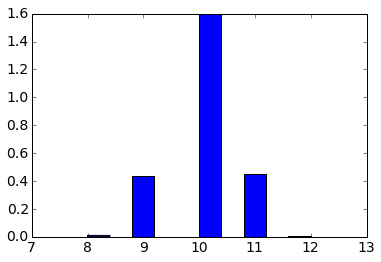

In [29]:
plt.hist(next_places, normed=True)

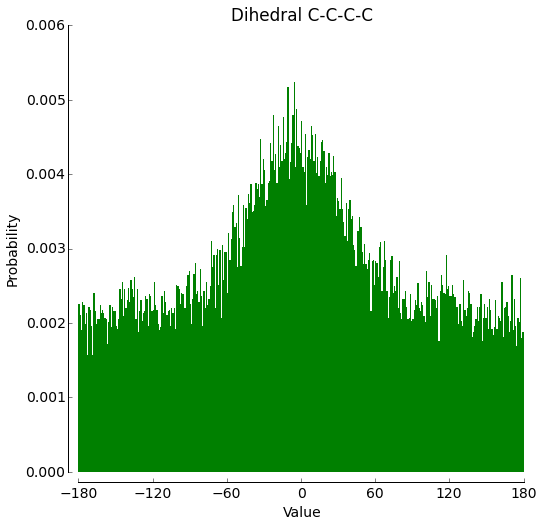

In [30]:
rng = np.arange(-180, 181, 1)
histgrm, bin_edges = np.histogram(data[:, 1], density = True, bins = rng)
width = 1.0 * (bin_edges[1] - bin_edges[0])
center = (bin_edges[:-1] + bin_edges[1:]) / 2
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
ax.bar(center, histgrm, align = 'center', width = width, color='g', edgecolor='none')
ax.set_xlabel('Value')
ax.set_ylabel('Probability')
ax.set_title('Dihedral C-C-C-C')
ax.set_xlim([-180, 181])
ax.set_xticks(np.arange(-180, 181, 60))
adjust_spines(ax, ['left', 'bottom'])
plt.show()

In [3]:
data = np.genfromtxt('Langevin-dynamics/cccc.dat')

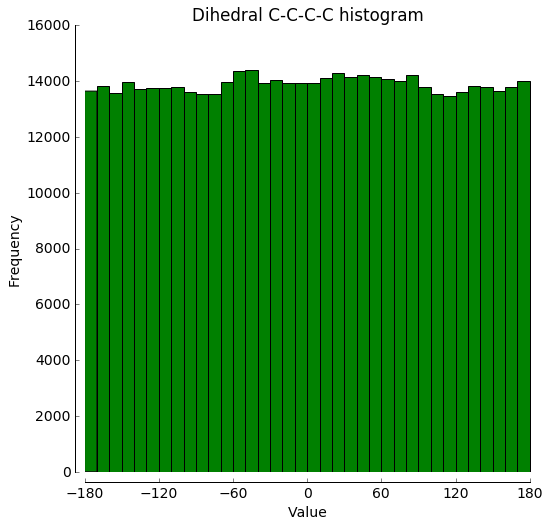

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
rng = np.arange(-180, 181, 10)
ax.hist(data[:, 1], color='g', normed=False, bins=rng)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_xlim([-180, 181])
ax.set_xticks(np.arange(-180, 181, 60))
ax.set_title('Dihedral C-C-C-C histogram')
adjust_spines(ax, ['left', 'bottom'])
plt.show()

In [5]:
rng = np.arange(-180, 180, 30)
digitized = np.digitize(data[:, 1], bins = rng)

In [6]:
this_bin = 10
when_in_this_bin = np.where(digitized == this_bin)[0]
next_place = np.array([digitized[i+1] for i in when_in_this_bin])
frequency_to_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
frequency_to_stay     = len(np.where(next_place == this_bin)[0]) / len(next_place)
frequency_to_next     = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)

In [7]:
frequency_to_previous = []
frequency_to_stay     = []
frequency_to_next     = []
bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
for this_bin in bin_numbers:
    when_in_this_bin = np.where(digitized == this_bin)[0]
    next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
    print('Times in bin {} = {}'.format(this_bin, len(next_place)))
    if this_bin == min(bin_numbers):
        this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next) 
    elif this_bin == max(bin_numbers):
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
        frequency_to_next.append(this_next)               

    else:
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next)


Times in bin 1 = 41040
Times in bin 2 = 41466
Times in bin 3 = 41164
Times in bin 4 = 41061
Times in bin 5 = 42692
Times in bin 6 = 41900
Times in bin 7 = 42348
Times in bin 8 = 42518
Times in bin 9 = 42315
Times in bin 10 = 40805
Times in bin 11 = 41233
Times in bin 12 = 41457


In [8]:
frequency_to_previous

[0.1324805068226121,
 0.13116770366083055,
 0.13531240890098145,
 0.13862302428094786,
 0.1457650145226272,
 0.15412887828162292,
 0.15549730801926892,
 0.15485206265581636,
 0.1489779038166135,
 0.14162480088224483,
 0.13147236436834575,
 0.12936295438647272]

In [9]:
frequency_to_next

[0.13394249512670564,
 0.13567742246659914,
 0.1398309202215528,
 0.1530893061542583,
 0.15232362035041694,
 0.15842482100238664,
 0.1569613677151223,
 0.149536666823463,
 0.13794162826420892,
 0.134444308295552,
 0.1315936264642398,
 0.1325952191427262]

In [10]:
frequency_to_stay

[0.7332358674463938,
 0.7329137124391067,
 0.7244193955883782,
 0.7077518813472639,
 0.7005293731846716,
 0.686491646778043,
 0.6862425616321904,
 0.6945764146949527,
 0.7123714994682737,
 0.7235632888126455,
 0.7365944752989111,
 0.7377523699254649]

In [11]:
import pandas as pd

In [12]:
df_previous = pd.DataFrame(frequency_to_previous)
df_stay = pd.DataFrame(frequency_to_stay)
df_next = pd.DataFrame(frequency_to_next)

In [13]:
df_previous

,0
0,0.132481
1,0.131168
2,0.135312
3,0.138623
4,0.145765
5,0.154129
6,0.155497
7,0.154852
8,0.148978
9,0.141625


In [14]:
pd.melt(df_previous)

,variable,value
0,0,0.132481
1,0,0.131168
2,0,0.135312
3,0,0.138623
4,0,0.145765
5,0,0.154129
6,0,0.155497
7,0,0.154852
8,0,0.148978
9,0,0.141625


In [15]:
df = pd.DataFrame(data={'Previous': frequency_to_previous, 'Stay':frequency_to_stay, 'Next':frequency_to_next})

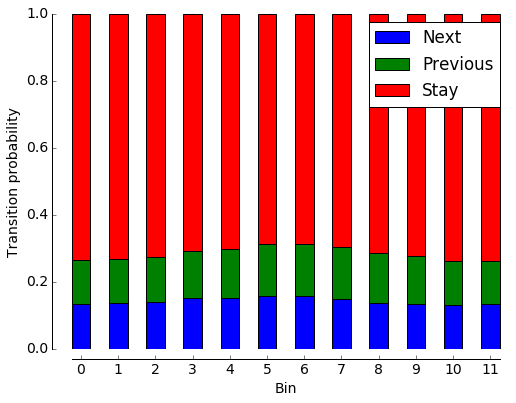

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
df.plot(ax = ax, kind='bar', stacked=True)
adjust_spines(ax, ['left', 'bottom'])
ax.set_xlabel('Bin')
ax.set_ylabel('Transition probability')
plt.show()

In [17]:
df.sem

<bound method _make_stat_function_ddof.<locals>.stat_func of         Next  Previous      Stay
0   0.133942  0.132481  0.733236
1   0.135677  0.131168  0.732914
2   0.139831  0.135312  0.724419
3   0.153089  0.138623  0.707752
4   0.152324  0.145765  0.700529
5   0.158425  0.154129  0.686492
6   0.156961  0.155497  0.686243
7   0.149537  0.154852  0.694576
8   0.137942  0.148978  0.712371
9   0.134444  0.141625  0.723563
10  0.131594  0.131472  0.736594
11  0.132595  0.129363  0.737752>

(0.1416054108831987, 0.71470354055135799, 0.14303011683560266)
(0.0028738827052685067, 0.0055895753258711151, 0.0029479569522805338)


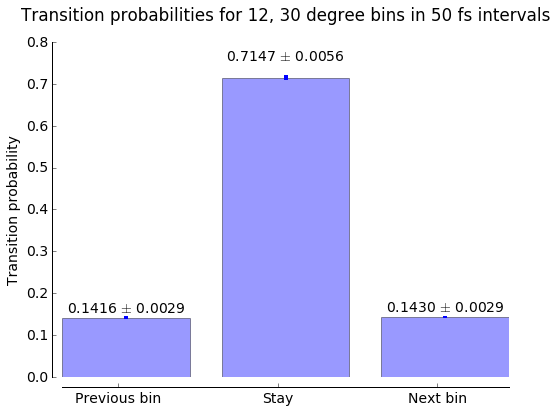

In [18]:
from scipy import stats
means = np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next)
sems  = stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next)
print(means)
print(sems)
index = np.arange(3)
bar_width = 0.35
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
opacity = 0.4
plt.xticks(index + bar_width, ('Previous bin', 'Stay', 'Next bin'))

rects = ax.bar(index, means, alpha = 0.4, yerr=sems, error_kw=dict(elinewidth=4, capsize = 0))
adjust_spines(ax, ['left', 'bottom'])
ax.set_ylabel('Transition probability')
ax.set_title('Transition probabilities for 12, 30 degree bins in 50 fs intervals', y=1.05)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        i = rects.index(rect)
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '{:.4f} $\pm$ {:.4f}'.format(height, sems[i]),
                ha='center', va='bottom')
autolabel(rects)
plt.show()

# Repeat this for the Langevin dynamics simulation, but use 60 bins instead of 12

In [19]:
rng = np.arange(-180, 180, 6)
digitized = np.digitize(data[:, 1], bins = rng)

frequency_to_previous = []
frequency_to_stay     = []
frequency_to_next     = []
bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
for this_bin in bin_numbers:
    when_in_this_bin = np.where(digitized == this_bin)[0]
    next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
    print('Times in bin {} = {}'.format(this_bin, len(next_place)))
    if this_bin == min(bin_numbers):
        this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next) 
    elif this_bin == max(bin_numbers):
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
        frequency_to_next.append(this_next)               

    else:
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next)


Times in bin 1 = 8163
Times in bin 2 = 8268
Times in bin 3 = 8208
Times in bin 4 = 8198
Times in bin 5 = 8203
Times in bin 6 = 8284
Times in bin 7 = 8510
Times in bin 8 = 8137
Times in bin 9 = 8238
Times in bin 10 = 8297
Times in bin 11 = 8393
Times in bin 12 = 8136
Times in bin 13 = 8237
Times in bin 14 = 8260
Times in bin 15 = 8138
Times in bin 16 = 8260
Times in bin 17 = 7965
Times in bin 18 = 8185
Times in bin 19 = 8232
Times in bin 20 = 8419
Times in bin 21 = 8609
Times in bin 22 = 8693
Times in bin 23 = 8666
Times in bin 24 = 8345
Times in bin 25 = 8379
Times in bin 26 = 8460
Times in bin 27 = 8416
Times in bin 28 = 8336
Times in bin 29 = 8362
Times in bin 30 = 8326
Times in bin 31 = 8417
Times in bin 32 = 8381
Times in bin 33 = 8322
Times in bin 34 = 8586
Times in bin 35 = 8642
Times in bin 36 = 8436
Times in bin 37 = 8479
Times in bin 38 = 8575
Times in bin 39 = 8537
Times in bin 40 = 8491
Times in bin 41 = 8474
Times in bin 42 = 8442
Times in bin 43 = 8419
Times in bin 44 = 84

(0.187343465555946, 0.2186652053068924, 0.18765900065126967)
(0.0013427672148387442, 0.0018876437791923296, 0.0012475507455706159)


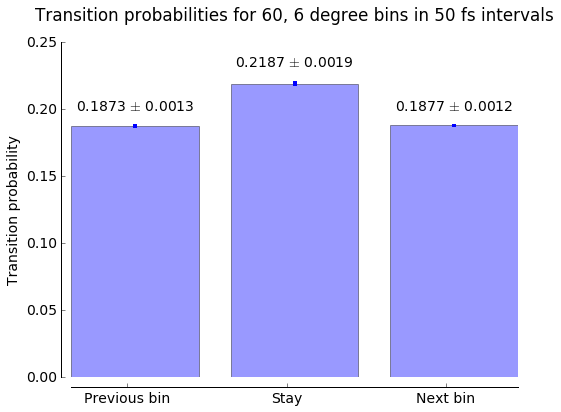

In [21]:
from scipy import stats
means = np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next)
sems  = stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next)
print(means)
print(sems))
bar_width = 0.35
index = np.arange(3
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
opacity = 0.4
plt.xticks(index + bar_width, ('Previous bin', 'Stay', 'Next bin'))

rects = ax.bar(index, means, alpha = 0.4, yerr=sems, error_kw=dict(elinewidth=4, capsize = 0))
adjust_spines(ax, ['left', 'bottom'])
ax.set_ylabel('Transition probability')
ax.set_title('Transition probabilities for 60, 6 degree bins in 50 fs intervals', y=1.05)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        i = rects.index(rect)
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '{:.4f} $\pm$ {:.4f}'.format(height, sems[i]),
                ha='center', va='bottom')
autolabel(rects)
plt.show()

## Ah, with more bins, the probability of staying and going to an adjacent bin is not nearly 1. This means we need to make finer time bins.

Times in bin 1 = 80519
Times in bin 2 = 80967
Times in bin 3 = 80952
Times in bin 4 = 80537
Times in bin 5 = 80522
Times in bin 6 = 81320
Times in bin 7 = 81884
Times in bin 8 = 82274
Times in bin 9 = 83376
Times in bin 10 = 83293
Times in bin 11 = 83640
Times in bin 12 = 83878
Times in bin 13 = 85106
Times in bin 14 = 85293
Times in bin 15 = 85181
Times in bin 16 = 84944
Times in bin 17 = 85676
Times in bin 18 = 86128
Times in bin 19 = 86395
Times in bin 20 = 86703
Times in bin 21 = 85957
Times in bin 22 = 85433
Times in bin 23 = 85648
Times in bin 24 = 85452
Times in bin 25 = 84445
Times in bin 26 = 84728
Times in bin 27 = 86042
Times in bin 28 = 85701
Times in bin 29 = 86189
Times in bin 30 = 86135
Times in bin 31 = 85041
Times in bin 32 = 85021
Times in bin 33 = 84707
Times in bin 34 = 84698
Times in bin 35 = 84257
Times in bin 36 = 83625
Times in bin 37 = 83181
Times in bin 38 = 82822
Times in bin 39 = 83359
Times in bin 40 = 83182
Times in bin 41 = 83852
Times in bin 42 = 84816
T

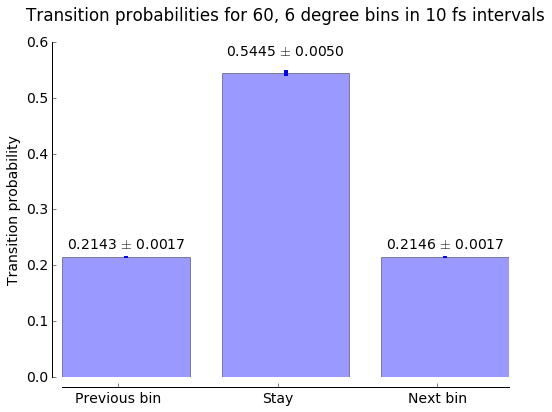

In [4]:
data = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')

rng = np.arange(-180, 180, 6)
digitized = np.digitize(data[:, 1], bins = rng)

frequency_to_previous = []
frequency_to_stay     = []
frequency_to_next     = []
bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
for this_bin in bin_numbers:
    when_in_this_bin = np.where(digitized == this_bin)[0]
    next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
    print('Times in bin {} = {}'.format(this_bin, len(next_place)))
    if this_bin == min(bin_numbers):
        this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next) 
    elif this_bin == max(bin_numbers):
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
        frequency_to_next.append(this_next)               

    else:
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next)

from scipy import stats
means = np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next)
sems  = stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next)
print(means)
print(sems)
bar_width = 0.35
index = np.arange(3)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
opacity = 0.4
plt.xticks(index + bar_width, ('Previous bin', 'Stay', 'Next bin'))

rects = ax.bar(index, means, alpha = 0.4, yerr=sems, error_kw=dict(elinewidth=4, capsize = 0))
adjust_spines(ax, ['left', 'bottom'])
ax.set_ylabel('Transition probability')
ax.set_title('Transition probabilities for 60, 6 degree bins in 10 fs intervals', y=1.05)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        i = rects.index(rect)
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '{:.4f} $\pm$ {:.4f}'.format(height, sems[i]),
                ha='center', va='bottom')
autolabel(rects)
plt.show()        

## 120 3-degree bins

Times in bin 1 = 40174
Times in bin 2 = 40345
Times in bin 3 = 40405
Times in bin 4 = 40562
Times in bin 5 = 40375
Times in bin 6 = 40577
Times in bin 7 = 40510
Times in bin 8 = 40027
Times in bin 9 = 40133
Times in bin 10 = 40389
Times in bin 11 = 40624
Times in bin 12 = 40696
Times in bin 13 = 40811
Times in bin 14 = 41073
Times in bin 15 = 40988
Times in bin 16 = 41286
Times in bin 17 = 41678
Times in bin 18 = 41698
Times in bin 19 = 41811
Times in bin 20 = 41482
Times in bin 21 = 41829
Times in bin 22 = 41811
Times in bin 23 = 41779
Times in bin 24 = 42099
Times in bin 25 = 42250
Times in bin 26 = 42856
Times in bin 27 = 42742
Times in bin 28 = 42551
Times in bin 29 = 42373
Times in bin 30 = 42808
Times in bin 31 = 42231
Times in bin 32 = 42713
Times in bin 33 = 42668
Times in bin 34 = 43008
Times in bin 35 = 42867
Times in bin 36 = 43261
Times in bin 37 = 43285
Times in bin 38 = 43110
Times in bin 39 = 43118
Times in bin 40 = 43585
Times in bin 41 = 43382
Times in bin 42 = 42575
T

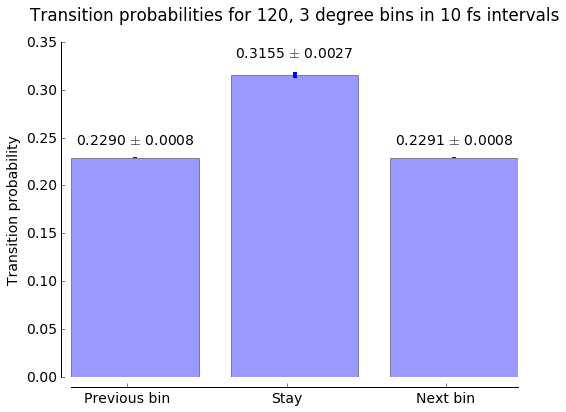

In [7]:
data = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')

rng = np.arange(-180, 180, 3)
digitized = np.digitize(data[:, 1], bins = rng)

frequency_to_previous = []
frequency_to_stay     = []
frequency_to_next     = []
bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
for this_bin in bin_numbers:
    when_in_this_bin = np.where(digitized == this_bin)[0]
    next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
    print('Times in bin {} = {}'.format(this_bin, len(next_place)))
    if this_bin == min(bin_numbers):
        this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next) 
    elif this_bin == max(bin_numbers):
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
        frequency_to_next.append(this_next)               

    else:
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next)

from scipy import stats
means = np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next)
sems  = stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next)
print(means)
print(sems)
bar_width = 0.35
index = np.arange(3)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
opacity = 0.4
plt.xticks(index + bar_width, ('Previous bin', 'Stay', 'Next bin'))

rects = ax.bar(index, means, alpha = 0.4, yerr=sems, error_kw=dict(elinewidth=4, capsize = 0))
adjust_spines(ax, ['left', 'bottom'])
ax.set_ylabel('Transition probability')
ax.set_title('Transition probabilities for 120, 3 degree bins in 10 fs intervals', y=1.05)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        i = rects.index(rect)
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '{:.4f} $\pm$ {:.4f}'.format(height, sems[i]),
                ha='center', va='bottom')
autolabel(rects)
plt.show()        

## 120 3-degree bins with -2 and +2

Times in bin 1 = 22383
Times in bin 2 = 22186
Times in bin 3 = 22412
Times in bin 4 = 22263
Times in bin 5 = 22209
Times in bin 6 = 22309
Times in bin 7 = 22208
Times in bin 8 = 21924
Times in bin 9 = 22121
Times in bin 10 = 21767
Times in bin 11 = 21621
Times in bin 12 = 21685
Times in bin 13 = 21547
Times in bin 14 = 21626
Times in bin 15 = 21511
Times in bin 16 = 21477
Times in bin 17 = 21634
Times in bin 18 = 21456
Times in bin 19 = 21538
Times in bin 20 = 21375
Times in bin 21 = 21383
Times in bin 22 = 21406
Times in bin 23 = 21093
Times in bin 24 = 20961
Times in bin 25 = 20776
Times in bin 26 = 20517
Times in bin 27 = 20730
Times in bin 28 = 20381
Times in bin 29 = 20270
Times in bin 30 = 20817
Times in bin 31 = 20737
Times in bin 32 = 21385
Times in bin 33 = 21173
Times in bin 34 = 21128
Times in bin 35 = 21198
Times in bin 36 = 20734
Times in bin 37 = 20815
Times in bin 38 = 21166
Times in bin 39 = 21288
Times in bin 40 = 21371
Times in bin 41 = 20964
Times in bin 42 = 21315
T

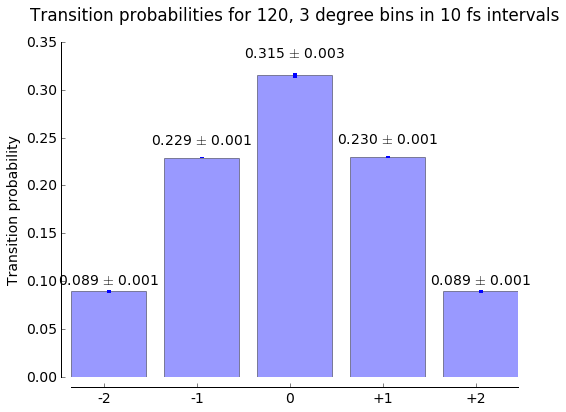

In [8]:
data = np.genfromtxt('/home/dslochower/Kirkwood/2015-Research/Nonequilibrium/torsional-diffusion-MD/Langevin-dynamics-10fs-recording/cccc.dat')

rng = np.arange(-180, 180, 3)
digitized = np.digitize(data[:, 1], bins = rng)

frequency_to_previous_previous = []
frequency_to_previous = []
frequency_to_stay     = []
frequency_to_next     = []
frequency_to_next_next = []

bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
for this_bin in bin_numbers:
    when_in_this_bin = np.where(digitized == this_bin)[0]
    next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
    print('Times in bin {} = {}'.format(this_bin, len(next_place)))
    if this_bin == min(bin_numbers):
        this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next)
        this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
        frequency_to_next_next.append(this_next_next)
    elif this_bin == max(bin_numbers):
        this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
        frequency_to_previous_previous.append(this_previous_previous)
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
        frequency_to_next.append(this_next)               

    else:
        this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
        frequency_to_previous_previous.append(this_previous_previous)
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next)
        this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
        frequency_to_next_next.append(this_next_next)


from scipy import stats
means = np.mean(frequency_to_previous_previous), np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next), np.mean(frequency_to_next_next)
sems  = stats.sem(frequency_to_previous_previous), stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next), stats.sem(frequency_to_next_next)
print(means)
print(sems)
bar_width = 0.35
index = np.arange(5)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
opacity = 0.4
plt.xticks(index + bar_width, ('-2', '-1', '0', '+1', '+2'))

rects = ax.bar(index, means, alpha = 0.4, yerr=sems, error_kw=dict(elinewidth=4, capsize = 0))
adjust_spines(ax, ['left', 'bottom'])
ax.set_ylabel('Transition probability')
ax.set_title('Transition probabilities for 120, 3 degree bins in 10 fs intervals', y=1.05)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        i = rects.index(rect)
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '{:.3f} $\pm$ {:.3f}'.format(height, sems[i]),
                ha='center', va='bottom')
autolabel(rects)
plt.show()        

## 30, 12-degree bins

Times in bin 1 = 89244
Times in bin 2 = 88650
Times in bin 3 = 87194
Times in bin 4 = 86161
Times in bin 5 = 86003
Times in bin 6 = 84843
Times in bin 7 = 82404
Times in bin 8 = 83209
Times in bin 9 = 84233
Times in bin 10 = 84640
Times in bin 11 = 84286
Times in bin 12 = 83061
Times in bin 13 = 83327
Times in bin 14 = 82399
Times in bin 15 = 83296
Times in bin 16 = 82953
Times in bin 17 = 82111
Times in bin 18 = 81312
Times in bin 19 = 80746
Times in bin 20 = 81277
Times in bin 21 = 80638
Times in bin 22 = 79371
Times in bin 23 = 80048
Times in bin 24 = 78915
Times in bin 25 = 79415
Times in bin 26 = 81089
Times in bin 27 = 81084
Times in bin 28 = 85210
Times in bin 29 = 86719
Times in bin 30 = 86161
(0.1204818933189266, 0.75887321779650074, 0.12046918893899086)
(0.0024135984278335328, 0.0047427599626180929, 0.0023318552979428192)


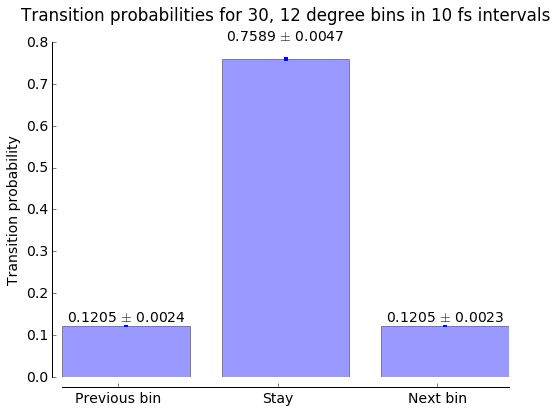

In [10]:
data = np.genfromtxt('/home/dslochower/Kirkwood/2015-Research/Nonequilibrium/torsional-diffusion-MD/Langevin-dynamics-10fs-recording/cccc.dat')

rng = np.arange(-180, 180, 12)
digitized = np.digitize(data[:, 1], bins = rng)

frequency_to_previous = []
frequency_to_stay     = []
frequency_to_next     = []
bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
for this_bin in bin_numbers:
    when_in_this_bin = np.where(digitized == this_bin)[0]
    next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
    print('Times in bin {} = {}'.format(this_bin, len(next_place)))
    if this_bin == min(bin_numbers):
        this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next) 
    elif this_bin == max(bin_numbers):
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
        frequency_to_next.append(this_next)               

    else:
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next)

from scipy import stats
means = np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next)
sems  = stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next)
print(means)
print(sems)
bar_width = 0.35
index = np.arange(3)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
opacity = 0.4
plt.xticks(index + bar_width, ('Previous bin', 'Stay', 'Next bin'))

rects = ax.bar(index, means, alpha = 0.4, yerr=sems, error_kw=dict(elinewidth=4, capsize = 0))
adjust_spines(ax, ['left', 'bottom'])
ax.set_ylabel('Transition probability')
ax.set_title('Transition probabilities for 30, 6 degree bins in 10 fs intervals', y=1.05)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        i = rects.index(rect)
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '{:.4f} $\pm$ {:.4f}'.format(height, sems[i]),
                ha='center', va='bottom')
autolabel(rects)
plt.show()        

## Scan bin sizes

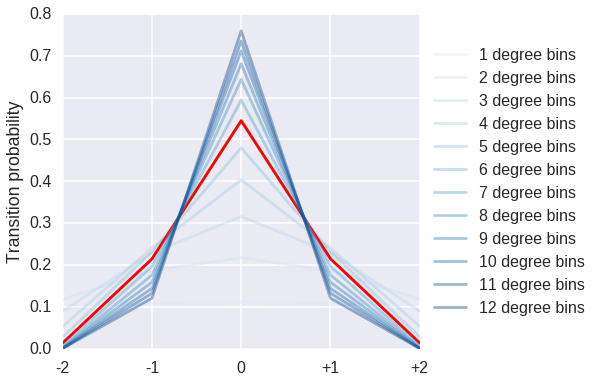

In [21]:
data = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
import seaborn as sns
sns.set_context("poster")
clr = sns.color_palette("Blues", 13)

for b in range(1, 13, 1):

    rng = np.arange(-180, 180, b)
    digitized = np.digitize(data[:, 1], bins = rng)

    frequency_to_previous_previous = []
    frequency_to_previous = []
    frequency_to_stay     = []
    frequency_to_next     = []
    frequency_to_next_next = []

    bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
    for this_bin in bin_numbers:
        when_in_this_bin = np.where(digitized == this_bin)[0]
        next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
        # print('Times in bin {} = {}'.format(this_bin, len(next_place)))
        if this_bin == min(bin_numbers):
            this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)
        elif this_bin == max(bin_numbers):
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
            frequency_to_next.append(this_next)               

        else:
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)


    from scipy import stats
    means = np.mean(frequency_to_previous_previous), np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next), np.mean(frequency_to_next_next)
    sems  = stats.sem(frequency_to_previous_previous), stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next), stats.sem(frequency_to_next_next)
    
    index = np.arange(5)
    
    ax.plot(index, means, alpha = 0.4, c=clr[b],  label='{} degree bins'.format(b))
    if b == 6:
        ax.plot(index, means,  c='r')
        
    
# adjust_spines(ax, ['left', 'bottom'])
ax.set_xticks(index)
ax.set_xticklabels(['-2', '-1', '0', '+1', '+2'])
ax.set_ylabel('Transition probability')
# ax.set_title('Transition probabilities for 120, 3 degree bins in 10 fs intervals', y=1.05)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()        

/home/dslochower/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


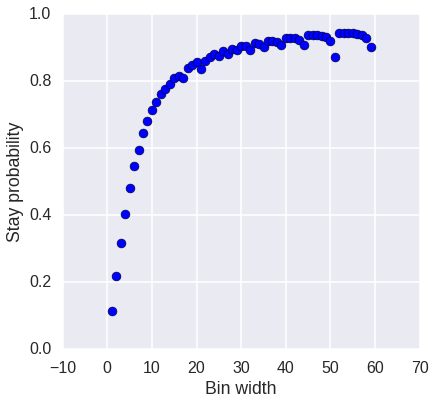

In [22]:
data = np.genfromtxt('/home/dslochower/data/projects/nonequilibrium/md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
import seaborn as sns
sns.set_context("poster")
clr = sns.color_palette("Blues", 13)

for b in range(1, 60, 1):

    rng = np.arange(-180, 180, b)
    digitized = np.digitize(data[:, 1], bins = rng)

    frequency_to_previous_previous = []
    frequency_to_previous = []
    frequency_to_stay     = []
    frequency_to_next     = []
    frequency_to_next_next = []

    bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
    for this_bin in bin_numbers:
        when_in_this_bin = np.where(digitized == this_bin)[0]
        next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
        # print('Times in bin {} = {}'.format(this_bin, len(next_place)))
        if this_bin == min(bin_numbers):
            this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)
        elif this_bin == max(bin_numbers):
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
            frequency_to_next.append(this_next)               

        else:
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)


    from scipy import stats
    means = np.mean(frequency_to_previous_previous), np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next), np.mean(frequency_to_next_next)
    sems  = stats.sem(frequency_to_previous_previous), stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next), stats.sem(frequency_to_next_next)
    
    index = np.arange(5)
    
    ax.scatter(b, means[2], c='b', s=80)
        
    
# adjust_spines(ax, ['left', 'bottom'])
# ax.set_xticks(index)
#ax.set_xticklabels(['-2', '-1', '0', '+1', '+2'])
ax.set_ylabel('Stay probability')
ax.set_xlabel('Bin width')
# ax.set_title('Transition probabilities for 120, 3 degree bins in 10 fs intervals', y=1.05)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()        

In [ ]:
data = np.genfromtxt('/home/dslochower/Kirkwood/2015-Research/Nonequilibrium/torsional-diffusion-MD/Langevin-dynamics-10fs-recording/cccc.dat')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
import seaborn as sns
sns.set_context("poster")
clr = sns.color_palette("Blues", 13)

for b in range(1, 60, 1):

    rng = np.arange(-180, 180, b)
    digitized = np.digitize(data[:, 1], bins = rng)

    frequency_to_previous_previous = []
    frequency_to_previous = []
    frequency_to_stay     = []
    frequency_to_next     = []
    frequency_to_next_next = []

    bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
    for this_bin in bin_numbers:
        when_in_this_bin = np.where(digitized == this_bin)[0]
        next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
        # print('Times in bin {} = {}'.format(this_bin, len(next_place)))
        if this_bin == min(bin_numbers):
            this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)
        elif this_bin == max(bin_numbers):
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
            frequency_to_next.append(this_next)               

        else:
            this_previous_previous = len(np.where(next_place == this_bin - 2)[0]) / len(next_place)
            frequency_to_previous_previous.append(this_previous_previous)
            this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
            frequency_to_previous.append(this_previous)
            this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
            frequency_to_stay.append(this_stay)
            this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
            frequency_to_next.append(this_next)
            this_next_next = len(np.where(next_place == this_bin + 2)[0]) / len(next_place)
            frequency_to_next_next.append(this_next_next)


    from scipy import stats
    means = np.mean(frequency_to_previous_previous), np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next), np.mean(frequency_to_next_next)
    sems  = stats.sem(frequency_to_previous_previous), stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next), stats.sem(frequency_to_next_next)
    
    index = np.arange(5)
    
    ax.scatter(b, means[1]+means[3], c='b', s=80)
        
    
# adjust_spines(ax, ['left', 'bottom'])
# ax.set_xticks(index)
#ax.set_xticklabels(['-2', '-1', '0', '+1', '+2'])
ax.set_ylabel('Sum of probability going into bins -1 and +1')
ax.set_xlabel('Bin width')
# ax.set_title('Transition probabilities for 120, 3 degree bins in 10 fs intervals', y=1.05)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()        

## 3-degree bins with a simulation recorded every 2 fs

Times in bin 1 = 84989
Times in bin 2 = 85430
Times in bin 3 = 83855
Times in bin 4 = 83984
Times in bin 5 = 83219
Times in bin 6 = 83124
Times in bin 7 = 83666
Times in bin 8 = 85792
Times in bin 9 = 86061
Times in bin 10 = 86029
Times in bin 11 = 85020
Times in bin 12 = 85589
Times in bin 13 = 86100
Times in bin 14 = 85553
Times in bin 15 = 84873
Times in bin 16 = 83595
Times in bin 17 = 85192
Times in bin 18 = 86188
Times in bin 19 = 86583
Times in bin 20 = 85606
Times in bin 21 = 86546
Times in bin 22 = 86102
Times in bin 23 = 86405
Times in bin 24 = 87876
Times in bin 25 = 86645
Times in bin 26 = 86621
Times in bin 27 = 85491
Times in bin 28 = 84385
Times in bin 29 = 84674
Times in bin 30 = 83875
Times in bin 31 = 83861
Times in bin 32 = 83547
Times in bin 33 = 83569
Times in bin 34 = 83246
Times in bin 35 = 82510
Times in bin 36 = 81136
Times in bin 37 = 80806
Times in bin 38 = 80266
Times in bin 39 = 81342
Times in bin 40 = 80893
Times in bin 41 = 81639
Times in bin 42 = 80402
T

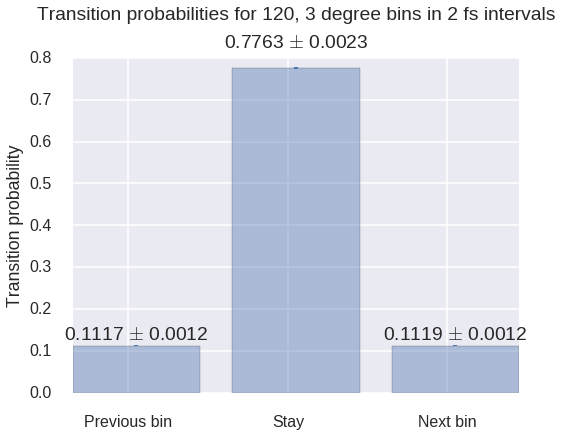

In [21]:
data = np.genfromtxt('/home/dslochower/Kirkwood/2015-Research/Nonequilibrium/torsional-diffusion-MD/Langevin-dynamics-2fs-recording/cccc.dat')

rng = np.arange(-180, 180, 3)
digitized = np.digitize(data[:, 1], bins = rng)

frequency_to_previous = []
frequency_to_stay     = []
frequency_to_next     = []
bin_numbers           = range(1, len(rng)+1) # Digitized starts at 1
for this_bin in bin_numbers:
    when_in_this_bin = np.where(digitized == this_bin)[0]
    next_place = np.array([digitized[i+1] for i in when_in_this_bin if i < len(digitized) - 1])
    print('Times in bin {} = {}'.format(this_bin, len(next_place)))
    if this_bin == min(bin_numbers):
        this_previous = len(np.where(next_place == max(bin_numbers))[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next) 
    elif this_bin == max(bin_numbers):
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == min(bin_numbers))[0]) / len(next_place)
        frequency_to_next.append(this_next)               

    else:
        this_previous = len(np.where(next_place == this_bin - 1)[0]) / len(next_place)
        frequency_to_previous.append(this_previous)
        this_stay = len(np.where(next_place == this_bin)[0]) / len(next_place)
        frequency_to_stay.append(this_stay)
        this_next = len(np.where(next_place == this_bin + 1)[0]) / len(next_place)
        frequency_to_next.append(this_next)

from scipy import stats
means = np.mean(frequency_to_previous), np.mean(frequency_to_stay), np.mean(frequency_to_next)
sems  = stats.sem(frequency_to_previous), stats.sem(frequency_to_stay), stats.sem(frequency_to_next)
print(means)
print(sems)
bar_width = 0.35
index = np.arange(3)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
opacity = 0.4
plt.xticks(index + bar_width, ('Previous bin', 'Stay', 'Next bin'))

rects = ax.bar(index, means, alpha = 0.4, yerr=sems, error_kw=dict(elinewidth=4, capsize = 0))
adjust_spines(ax, ['left', 'bottom'])
ax.set_ylabel('Transition probability')
ax.set_title('Transition probabilities for 120, 3 degree bins in 2 fs intervals', y=1.1)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        i = rects.index(rect)
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '{:.4f} $\pm$ {:.4f}'.format(height, sems[i]),
                ha='center', va='bottom')
autolabel(rects)
plt.show()        